# Describing Distributions

Analyze and visualize several features in the Medical Dataset: https://docs.google.com/spreadsheets/d/1APV3pXiAszS_0mSgkiEt9IUNH-QmyX7KwxSAwuADl6Y/gviz/tq?tqx=out:csv&sheet=medical_data

Features to analyze:
- VitD_levels
- Doc_visits
- TotalCharge

For each feature listed:

1. Plot a histogram with a kde (kernel density estimate)
    - Add a line for the mean (red)
    - Add a line for the median (green)
    - Add a line for for +1 std from the mean (black)
    - Add a line for the - 1 std from the mean (black)
    - Highlight the range between +1 and =1 std (yellow)

2. Answer the following questions:
    - Is it Discrete or Continuous?
    - Does it have a skew? If so, which direction (+/-)
    - What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)


# 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 2. Read in data

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1APV3pXiAszS_0mSgkiEt9IUNH-QmyX7KwxSAwuADl6Y/gviz/tq?tqx=out:csv&sheet=medical_data'
df = pd.read_csv(url)
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


# 3. Helper Functions

In [3]:
# define helper function to calculate statistics
def calculate_statistics(col):
    # calculate mean
    mean = df[col].mean()
    
    # calculate median
    median = df[col].median()
    
    # calculate std
    std = df[col].std()
    plus_one_std = mean + std
    minus_one_std = mean - std
    
    return mean, median, plus_one_std, minus_one_std

In [4]:
# define helper function to draw histograms
def draw_histogram(col):
    
    # calculate statistics
    mean, median, plus_one_std, minus_one_std = calculate_statistics(col)
    
    fig, ax = plt.subplots(figsize=(10,6))
    sns.histplot(df[col], ax = ax, stat='probability')

    # mean
    ax.axvline(mean, color = 'red', 
               label = f'Mean = {mean:,.2f}')

    # median
    ax.axvline(median, color = 'green', 
               label = f'Median = {median:,.2f}')

    # std
    ax.axvline(plus_one_std, color = 'black',
               label=f'+1 std = {plus_one_std:,.2f}')
    ax.axvline(minus_one_std, color = 'black', 
               label = f'-1 std = {minus_one_std:,.2f}')
    ax.axvspan(plus_one_std, minus_one_std, 
               color = 'yellow', zorder = 0)

    # title
    ax.set_title(col)

    # legend
    ax.legend();

In [5]:
# helper function to calculate kurtosis
def calculate_kurtosis(col):
    
    kurt = round(stats.kurtosis(df[col], fisher = False), 1)
    
    if kurt == 3.0:
        print(f"Kurtosis: {kurt}; Mesokurtic")
    elif kurt > 3.0:
        print(f"Kurtosis: {kurt}; Leptokurtic")
    else:
        print(f"Kurtosis: {kurt}; Platykurtic")        

# 4. VitD_levels

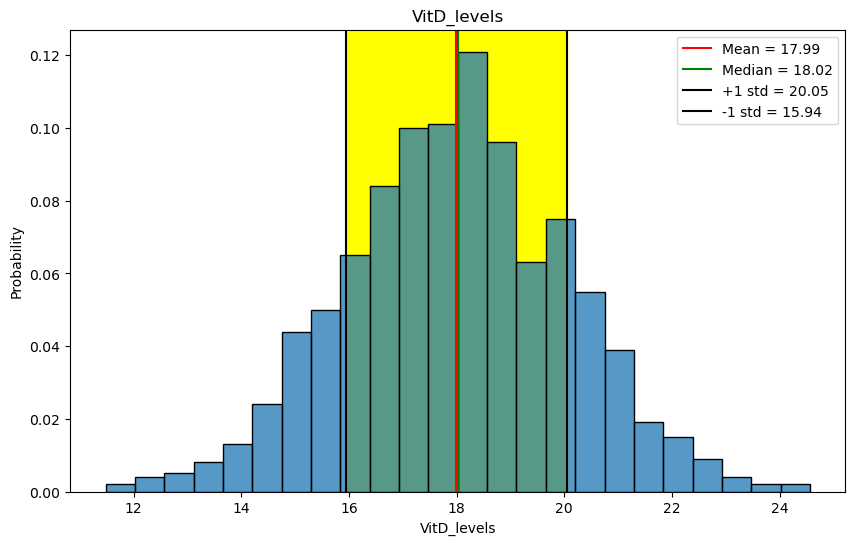

In [6]:
col = 'VitD_levels'
draw_histogram(col)

In [7]:
calculate_kurtosis(col)

Kurtosis: 3.0; Mesokurtic


1. Is it Discrete or Continuous?
    - Continuous


2. Does it have a skew? If so, which direction (+/-)
    - No skew
    

3. What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    - Mesokurtic

# 5. Doc_visits

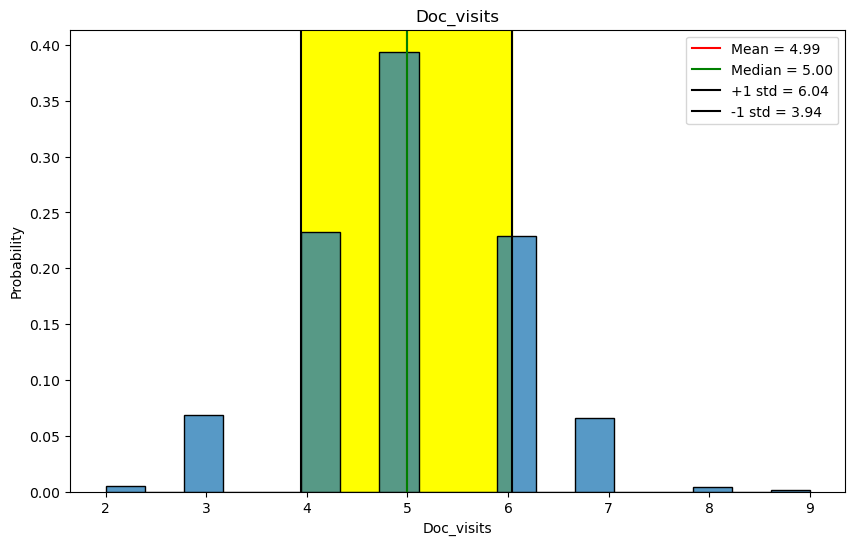

In [8]:
col = 'Doc_visits'
draw_histogram(col)

In [9]:
calculate_kurtosis(col)

Kurtosis: 3.0; Mesokurtic


1. Is it Discrete or Continuous?
    - Discrete


2. Does it have a skew? If so, which direction (+/-)
    - No skew
    

3. What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    - Mesokurtic

# 6. TotalCharge

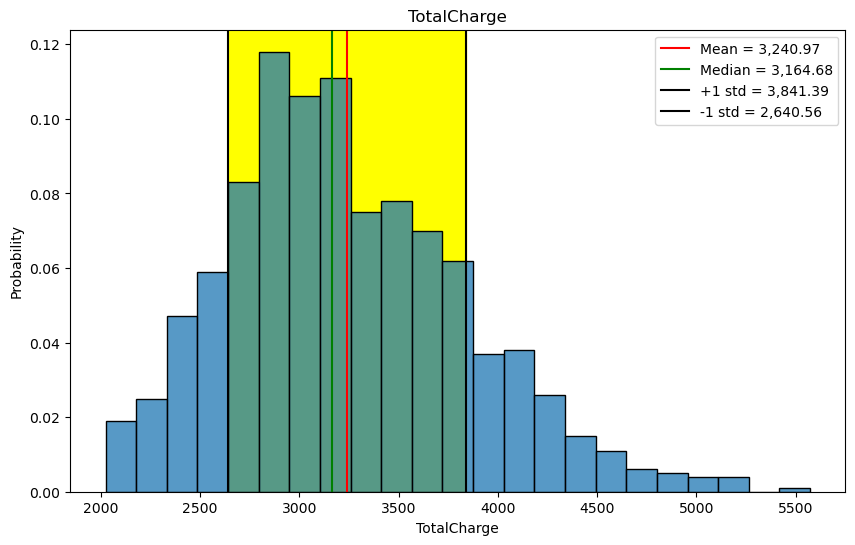

In [10]:
col = 'TotalCharge'
draw_histogram(col)

In [11]:
calculate_kurtosis(col)

Kurtosis: 3.3; Leptokurtic


1. Is it Discrete or Continuous?
    - Continuous


2. Does it have a skew? If so, which direction (+/-)
    - Positive
    

3. What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    - Leptokurtic